<a href="https://colab.research.google.com/github/AlejandroPinto5/Decision-Tree/blob/main/Desicion_Tree_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Decision Tree Implementation**

In [25]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Importing dataset
url = 'https://raw.githubusercontent.com/AlejandroPinto5/KNN-algorithm/main/data_cleaned.csv'
df = pd.read_csv(url)
df.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [3]:
# Checking NaN values
df.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [5]:
# Checking stats
df.describe()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,32.204208,0.242424,0.206510,0.551066,0.352413,0.647587,0.682379,0.234568,...,0.760943,0.132435,0.089787,0.005612,0.004489,0.005612,0.001122,0.188552,0.086420,0.725028
std,0.486592,13.002015,49.693429,0.428790,0.405028,0.497665,0.477990,0.477990,0.465813,0.423966,...,0.426747,0.339154,0.286037,0.074743,0.066890,0.074743,0.033501,0.391372,0.281141,0.446751
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.699118,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,35.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# Separating independent and dependent variables
y = df['Survived']
x = df.drop(['Survived'],axis = 1)

In [6]:
# splitting train test dataset
from sklearn.model_selection import train_test_split

xtrain, xvalid, ytrain, yvalid = train_test_split(x, y, random_state = 101, stratify = y, test_size=0.25) #, stratify ensures distribution of classes is similar. Validation will contain 25 %

In [9]:
# Checking distribution data
ytrain.value_counts(normalize=True), yvalid.value_counts(normalize=True)

(0    0.616766
 1    0.383234
 Name: Survived, dtype: float64,
 0    0.61435
 1    0.38565
 Name: Survived, dtype: float64)

In [20]:
# Making desicion tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

modelDT = DecisionTreeClassifier(random_state= 10)
modelDT.fit(xtrain, ytrain) #Fitting model
modelDT.score(xtrain, ytrain), modelDT.score(xvalid, yvalid) #Checking train and validation score

(0.9880239520958084, 0.7533632286995515)

In [16]:
# Predicting model
modelDT.predict(xvalid)
modelDT.predict_proba(xvalid)

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.

In [22]:
# Play with threshold to up accuracy taking the first column. Not always necessary
ypred = modelDT.predict_proba(xvalid)[:,1]

new_y = []
for i in range(len(ypred)):
  if ypred[i] < 0.6:
    new_y.append(0)
  else:
    new_y.append(1)

from sklearn.metrics import accuracy_score # Importing evaluation metric
accuracy_score(yvalid, new_y)

0.7533632286995515

In [24]:
# Creating dataset from the values and change max_depth
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
  modelDT = DecisionTreeClassifier(max_depth = depth, random_state = 10)
  modelDT.fit(xtrain,ytrain)
  train_accuracy.append(modelDT.score(xtrain, ytrain))
  validation_accuracy.append(modelDT.score(xvalid, yvalid))

df2 = pd.DataFrame({'max_depth': range(1,10), 'train_acc': train_accuracy, 'valid_acc': validation_accuracy})
df2.head()

,max_depth,train_acc,valid_acc
0,1,0.803892,0.735426
1,2,0.803892,0.735426
2,3,0.830838,0.766816
3,4,0.847305,0.771300
4,5,0.847305,0.771300


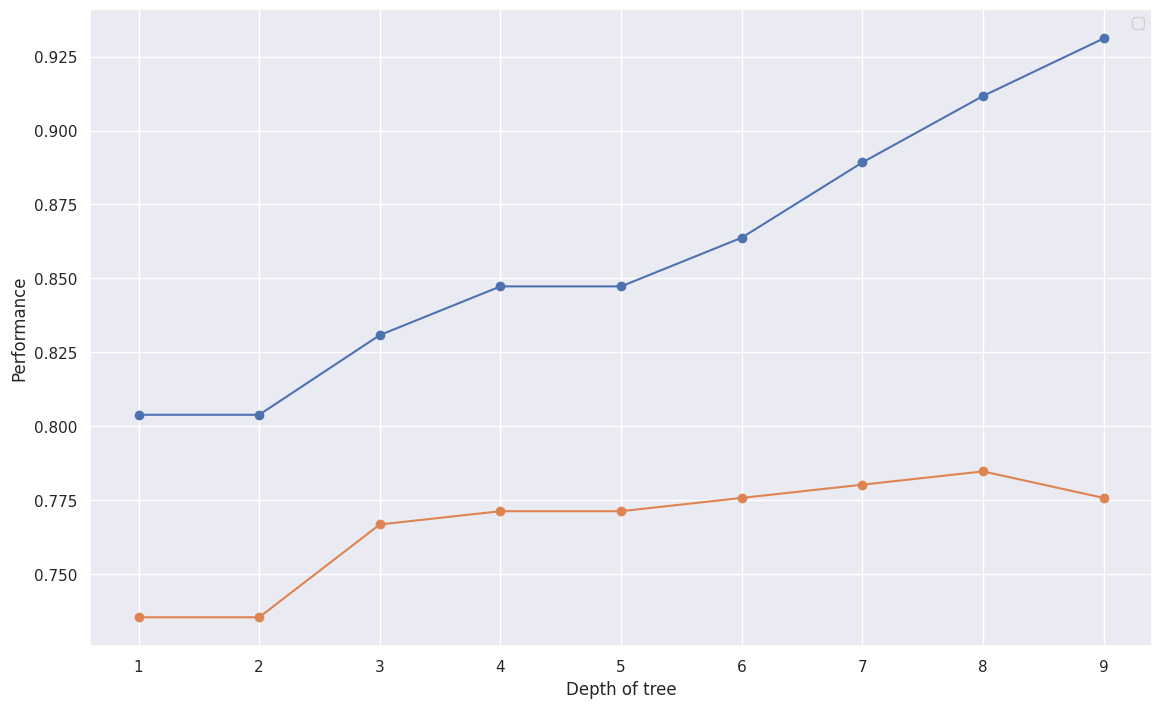

In [28]:
sb.set(rc={'figure.figsize':(13.7,8.27)})
plt.plot(df2['max_depth'], df2['train_acc'], marker = 'o')
plt.plot(df2['max_depth'], df2['valid_acc'], marker = 'o')
plt.xlabel('Depth of tree')
plt.ylabel('Performance')
plt.legend()

**Conclusion:** When we have a max depth of one, both the training aswell the validation accuracies were less, so keeping a lower value of MAC step didn't allow the model to learn patterns and hence we got very low performance, probably a case of under-fitting. 

As the max step now keeps on increasing both training and validation is increasing as well. The magnitude ofincrease in training accuracy is higher ascompared to the magnitude of increasing the validation accuracy.

When we look at the max depth of 8, it is producing the highest validation accuracy and hece we can set max depth as 8.

##Trying differents paramenters

In [32]:
modelDT = DecisionTreeClassifier(max_depth = 8, max_leaf_nodes = 25, random_state = 10) # Also, you can use minimum sample split, or minimum samples leaf vector. Trying the best combination of parameters
modelDT.fit(xtrain, ytrain) #Fitting model
modelDT.score(xtrain, ytrain), modelDT.score(xvalid, yvalid) # Much better

(0.8802395209580839, 0.8116591928251121)

In [31]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
from sklearn import tree
decision_tree = tree.export_graphviz(modelDT, out_file = 'tree.dot', feature_names = xtrain.columns, max_depth = 3, filled = True)

In [39]:
!dot -Tpng tree.dot -o tree.png

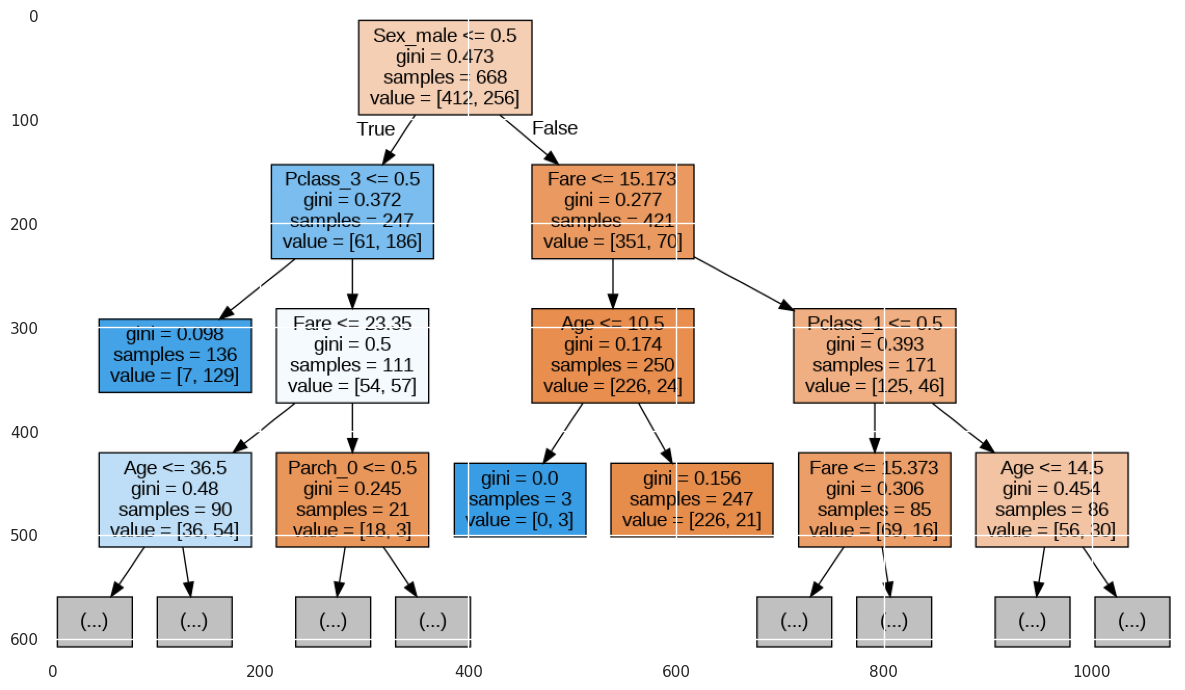

In [40]:
img = plt.imread('tree.png')
plt.imshow(img)

**Conclusion:** The tree only till the depth of 3 has been printed. You can increase the depth as well to plot deeper trees. First split is about 'gender', the gini for this split was 0.473and there are total of 558 samples. There are 247 females and 421 males.

The first node is splitted based on 'P class' and the second nodes is splitted based on 'Fare'. And so and so on.

###**Applications:**

    1. Fraud detection.
    2. Credit risk.
    3. Loan default.
    4. Predicting sales of a retail outlet.
    5. Number of bikesrented.
    6. Employee attrition.
    7. Customer churn.